In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("PastLoans.csv")

In [4]:
# encode sex column

df["sex"] = df["sex"].map({"M": 0, "F": 1})

In [5]:
# Encode employment column

df["employment"] = df["employment"].map(
    {"unemployed": 0, "student": 1, "employed": 2, "retired": 3}
)

In [6]:
df.head()

,sex,employment,married,income,digital1,digital2,digital3,default
0,0,0,0,0,0.749267,0.422656,0.738735,0
1,0,2,1,26108,0.697428,0.596361,0.733947,0
2,0,2,1,11810,0.000000,0.652496,0.000000,0
3,0,0,1,0,0.000000,0.000000,0.000000,0
4,1,3,1,6310,0.000000,0.041123,0.203202,0


In [7]:
df.describe()

,sex,employment,married,income,digital1,digital2,digital3,default
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.426690,1.668010,0.60822,18646.253910,0.417739,0.415741,0.414914,0.099470
std,0.494599,0.859884,0.48815,48178.198971,0.325269,0.325093,0.325064,0.299294
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,5385.000000,0.064623,0.062594,0.060467,0.000000
50%,0.000000,2.000000,1.00000,9370.000000,0.448209,0.444645,0.440936,0.000000
75%,1.000000,2.000000,1.00000,17474.250000,0.696019,0.694762,0.692441,0.000000
max,1.000000,3.000000,1.00000,1000000.000000,0.999975,0.999986,0.999965,1.000000


In [8]:
df["default"].value_counts()

default
0    90053
1     9947
Name: count, dtype: int64

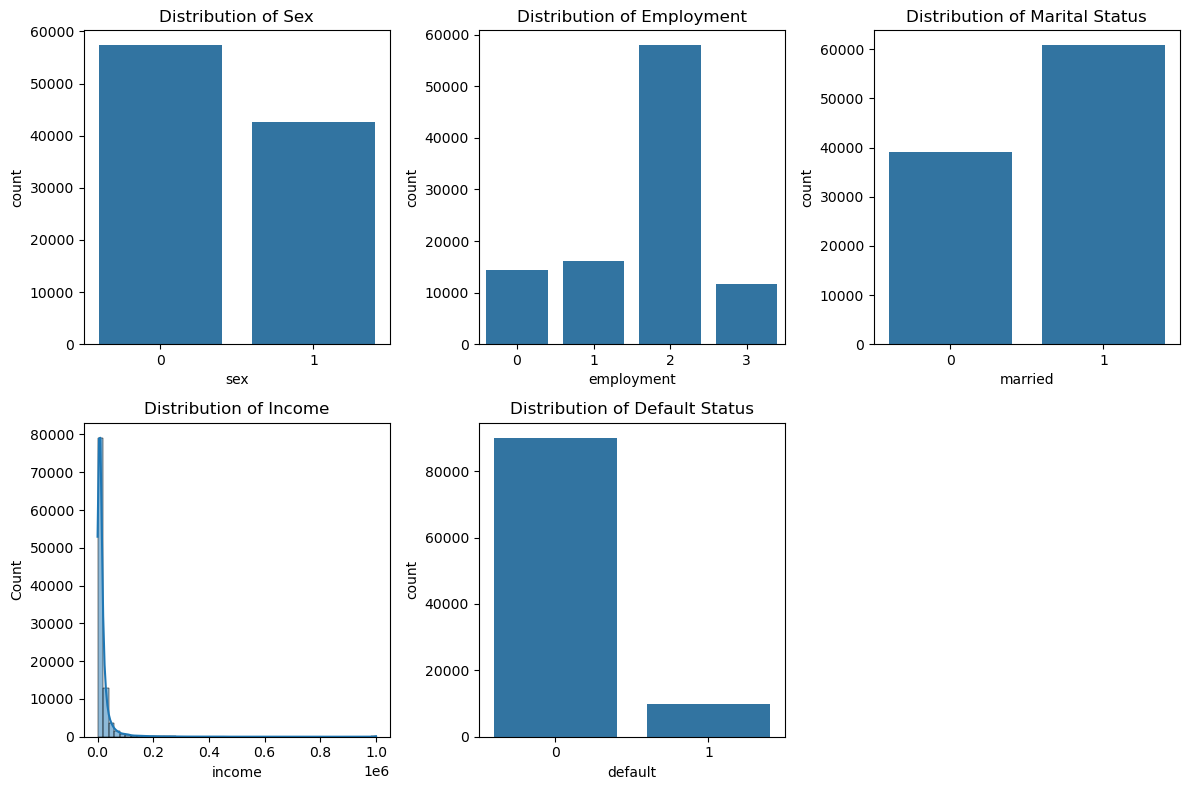

In [8]:
# Set up the plotting environment
plt.figure(figsize=(12, 8))

# Plot the distribution of sex
plt.subplot(2, 3, 1)
sns.countplot(x="sex", data=df)
plt.title("Distribution of Sex")

# Plot the distribution of employment
plt.subplot(2, 3, 2)
sns.countplot(x="employment", data=df)
plt.title("Distribution of Employment")

# Plot the distribution of marital status
plt.subplot(2, 3, 3)
sns.countplot(x="married", data=df)
plt.title("Distribution of Marital Status")

# Plot the distribution of income
plt.subplot(2, 3, 4)
sns.histplot(df["income"], bins=50, kde=True)
plt.title("Distribution of Income")

# Plot the distribution of default status
plt.subplot(2, 3, 5)
sns.countplot(x="default", data=df)
plt.title("Distribution of Default Status")

plt.tight_layout()
plt.show()


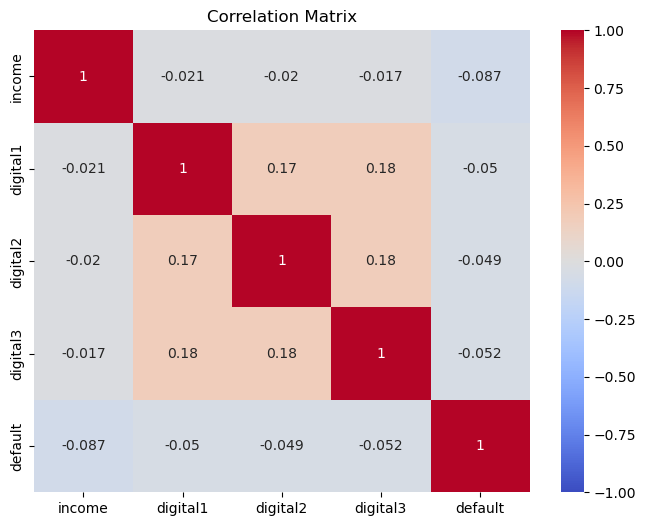

In [9]:
# Correlation matrix
corr_matrix = df[["income", "digital1", "digital2", "digital3", "default"]].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


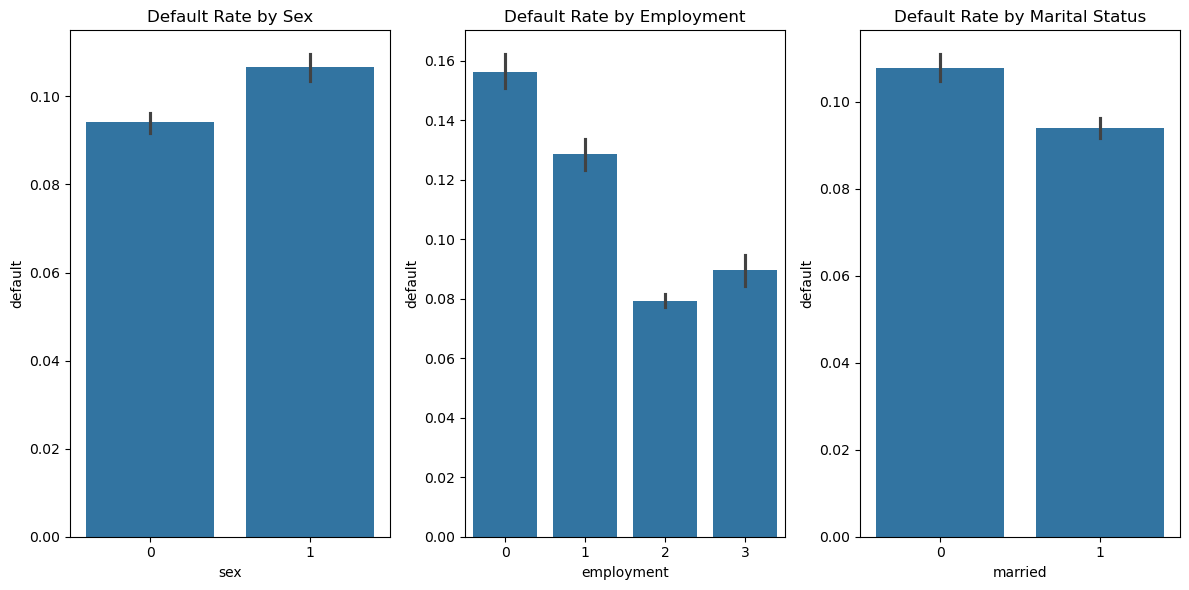

In [10]:
# Plot the default rate by sex
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x="sex", y="default", data=df)
plt.title("Default Rate by Sex")

# Plot the default rate by employment
plt.subplot(1, 3, 2)
sns.barplot(x="employment", y="default", data=df)
plt.title("Default Rate by Employment")

# Plot the default rate by marital status
plt.subplot(1, 3, 3)
sns.barplot(x="married", y="default", data=df)
plt.title("Default Rate by Marital Status")

plt.tight_layout()
plt.show()


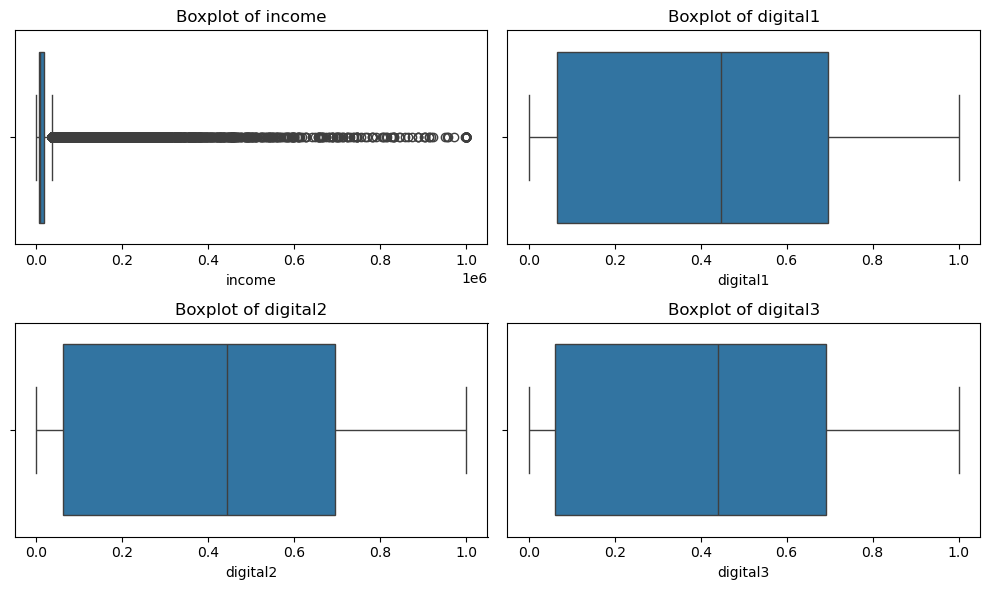

In [11]:
# Set up the plotting environment
plt.figure(figsize=(10, 6))

# Plot boxplots for numeric features
numeric_columns = ["income", "digital1", "digital2", "digital3"]

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [12]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    return outliers


# Detect outliers in income
outliers_income = detect_outliers_iqr(df, "income")

# Detect outliers in digital footprints
outliers_digital1 = detect_outliers_iqr(df, "digital1")
outliers_digital2 = detect_outliers_iqr(df, "digital2")
outliers_digital3 = detect_outliers_iqr(df, "digital3")


Number of outliers in income: 9610
Number of outliers in digital1: 0
Number of outliers in digital2: 0
Number of outliers in digital3: 0


In [13]:
# Count the number of outliers in income that are fraud (default = 1)
fraud_outliers_income = outliers_income[outliers_income["default"] == 1]
num_fraud_outliers_income = len(fraud_outliers_income)

print(f"Number of income outliers that are fraud: {num_fraud_outliers_income}")

Number of income outliers that are fraud: 65


In [14]:
# Calculate the percentage of defaults in the entire dataframe
total_defaults = df["default"].sum()
total_entries = len(df)
percentage_defaults_df = (total_defaults / total_entries) * 100

# Calculate the percentage of defaults in the income outliers dataframe
total_defaults_outliers = outliers_income["default"].sum()
total_entries_outliers = len(outliers_income)
percentage_defaults_outliers = (total_defaults_outliers / total_entries_outliers) * 100

print(f"Percentage of defaults in the entire dataframe: {percentage_defaults_df:.2f}%")
print(
    f"Percentage of defaults in the income outliers: {percentage_defaults_outliers:.2f}%"
)

Percentage of defaults in the entire dataframe: 9.95%
Percentage of defaults in the income outliers: 0.68%


In [18]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    balanced_accuracy_score,
    roc_curve,
    auc,
)

In [7]:
X = df.drop(["default", "digital1", "digital2"], axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Baseline

Accuracy: 0.5904333333333334
Balanced Accuracy: 0.6590195086458546
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.57      0.72     27016
           1       0.16      0.74      0.27      2984

    accuracy                           0.59     30000
   macro avg       0.56      0.66      0.49     30000
weighted avg       0.87      0.59      0.67     30000



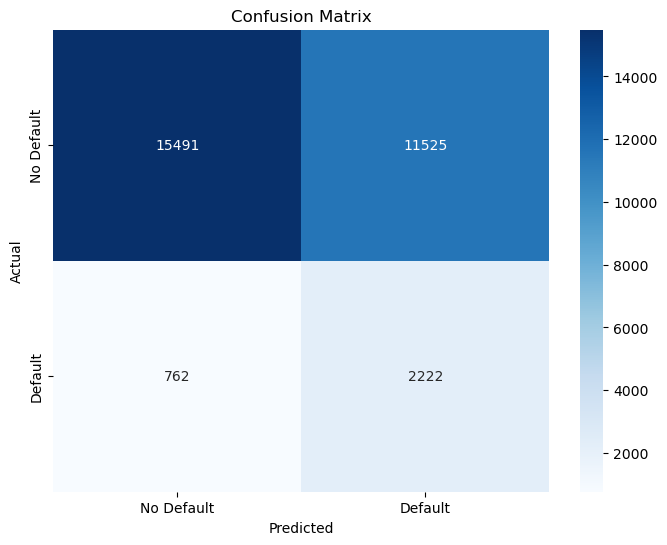

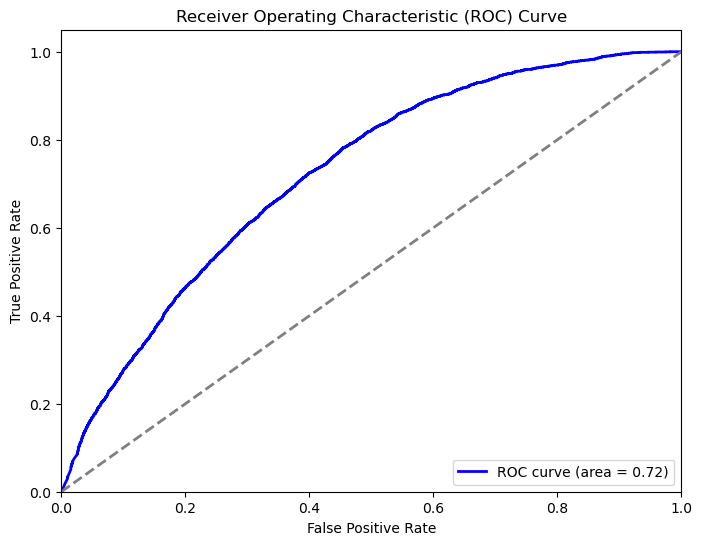

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize the KNN classifier
lr = LogisticRegression(max_iter=1000, class_weight="balanced")

# Fit the model
lr.fit(X_train, y_train)

# Predict the test set
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [31]:
X_train_new = X_train.copy()

In [28]:
X_train["Logistic PD"] = lr.predict_proba(X_train)[:, 1]

In [35]:
X_train_new

,sex,employment,married,income,digital3,Logistic PD
93261,1,2,1,15064,0.579146,0.332785
45371,0,2,0,6816,0.486127,0.519098
81342,0,1,0,0,0.862158,0.617709
80334,0,2,1,28404,0.193084,0.166982
38352,1,2,0,7030,0.000000,0.607572
...,...,...,...,...,...,...
67987,1,2,1,26900,0.423650,0.161235
66538,1,0,1,0,0.502762,0.708247
99571,1,2,1,13245,0.543493,0.376912
78531,0,2,1,11035,0.000000,0.530045


Accuracy: 0.8574
Balanced Accuracy: 0.5467022421823707
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     27016
           1       0.21      0.16      0.18      2984

    accuracy                           0.86     30000
   macro avg       0.56      0.55      0.55     30000
weighted avg       0.84      0.86      0.85     30000



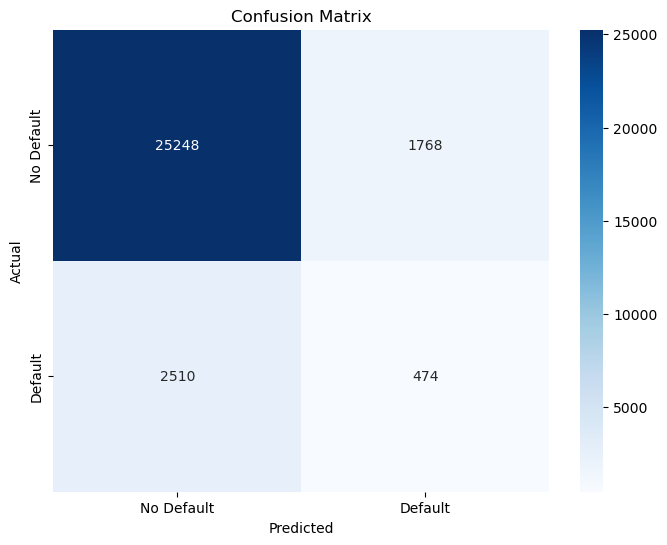

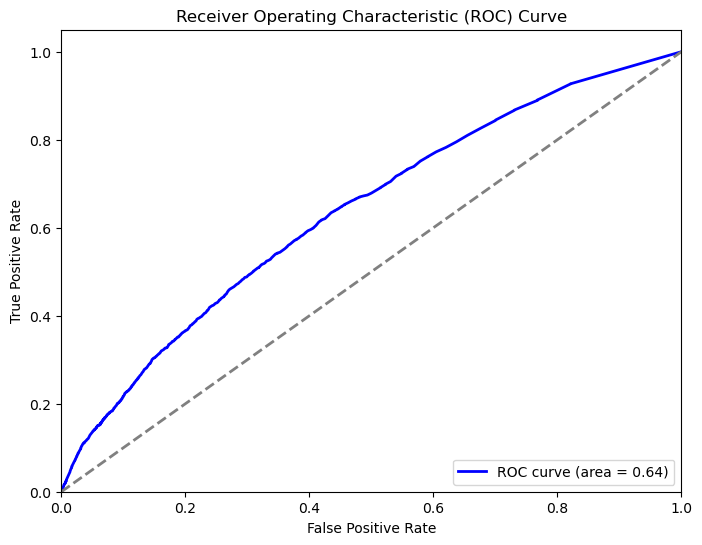

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, class_weight="balanced", random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy: {balanced_acc_rf}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf, tpr_rf, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_rf:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [36]:
X_train_new["Random Forest PD"] = rf.predict_proba(X_train)[:, 1]

In [7]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
X_train.columns

Index(['sex', 'employment', 'married', 'income', 'digital3'], dtype='object')

In [10]:
categorical_features = ["sex", "employment", "married"]

In [21]:
import catboost as cb

cb_model = cb.CatBoostClassifier(
    iterations=10000,
    learning_rate=0.01,
    depth=6,
    boosting_type="Plain",
    cat_features=categorical_features,
    loss_function="Logloss",
    auto_class_weights="Balanced",
    eval_metric="AUC",
    verbose=100,
)

In [22]:
cb_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

0:	test: 0.7123562	best: 0.7123562 (0)	total: 112ms	remaining: 18m 40s
100:	test: 0.7273705	best: 0.7274023 (99)	total: 11.2s	remaining: 18m 18s
200:	test: 0.7303250	best: 0.7303250 (200)	total: 22.3s	remaining: 18m 8s
300:	test: 0.7330845	best: 0.7330845 (299)	total: 32.9s	remaining: 17m 40s
400:	test: 0.7346866	best: 0.7346877 (398)	total: 43.2s	remaining: 17m 14s
500:	test: 0.7355427	best: 0.7355452 (499)	total: 54s	remaining: 17m 4s
600:	test: 0.7359458	best: 0.7359458 (600)	total: 1m 4s	remaining: 16m 48s
700:	test: 0.7362903	best: 0.7362903 (700)	total: 1m 14s	remaining: 16m 32s
800:	test: 0.7365448	best: 0.7365534 (795)	total: 1m 24s	remaining: 16m 15s
900:	test: 0.7367570	best: 0.7367570 (900)	total: 1m 34s	remaining: 15m 55s
1000:	test: 0.7368345	best: 0.7368397 (995)	total: 1m 44s	remaining: 15m 41s
1100:	test: 0.7370310	best: 0.7370314 (1098)	total: 1m 54s	remaining: 15m 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7370902637
bestIteration = 1131



Accuracy: 0.5964
Balanced Accuracy: 0.6752999513345681
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     27016
           1       0.17      0.77      0.28      2984

    accuracy                           0.60     30000
   macro avg       0.56      0.68      0.50     30000
weighted avg       0.88      0.60      0.68     30000



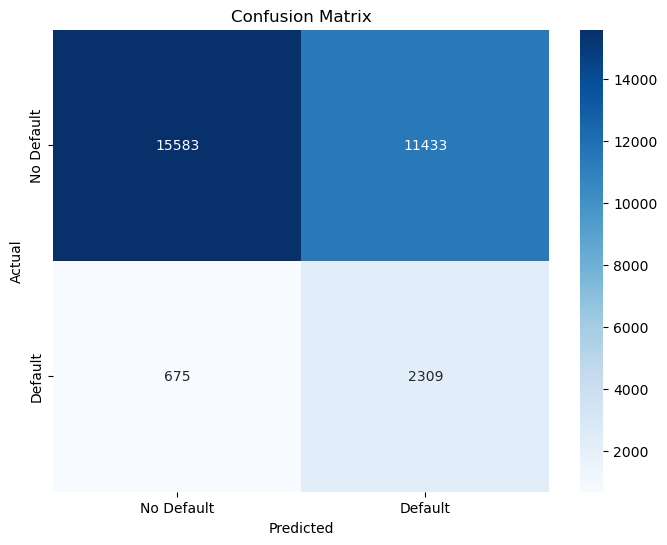

In [23]:
# Predict the test set
y_pred_cb = cb_model.predict(X_test)

# Calculate accuracy
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(f"Accuracy: {accuracy_cb}")

# Balanced accuracy
balanced_acc_cb = balanced_accuracy_score(y_test, y_pred_cb)

print(f"Balanced Accuracy: {balanced_acc_cb}")

# Classification report
print("Classification Report:")

print(classification_report(y_test, y_pred_cb))

# Confusion matrix
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_cb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.7458666666666667
Balanced Accuracy: 0.6555904514135602
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84     27016
           1       0.21      0.54      0.30      2984

    accuracy                           0.75     30000
   macro avg       0.57      0.66      0.57     30000
weighted avg       0.87      0.75      0.79     30000



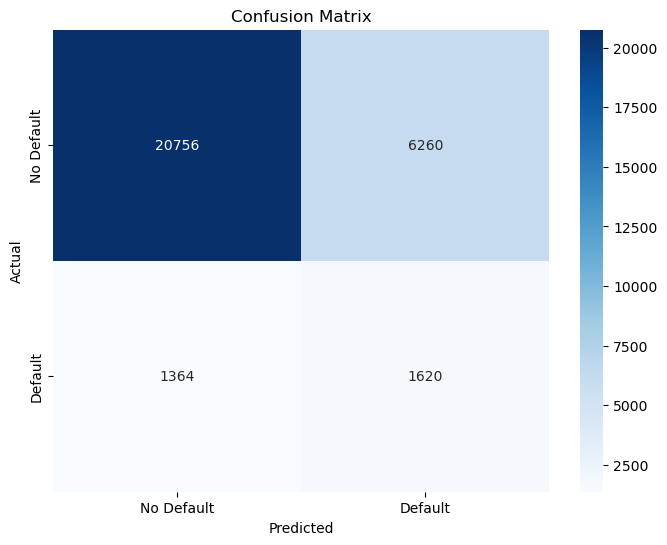

In [25]:
# Adjust probability threshold of the CatBoost model

threshold = 0.6

y_prob_cb = cb_model.predict_proba(X_test)[:, 1]
y_pred_cb_threshold = (y_prob_cb > threshold).astype(int)

# Calculate accuracy
accuracy_cb_threshold = accuracy_score(y_test, y_pred_cb_threshold)
print(f"Accuracy: {accuracy_cb_threshold}")

# Balanced accuracy
balanced_acc_cb_threshold = balanced_accuracy_score(y_test, y_pred_cb_threshold)
print(f"Balanced Accuracy: {balanced_acc_cb_threshold}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_cb_threshold))

# Confusion matrix
conf_matrix_cb_threshold = confusion_matrix(y_test, y_pred_cb_threshold)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_cb_threshold,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [38]:
X_train_new["CatBoost PD"] = cb_model.predict_proba(X_train)[:, 1]

In [15]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Convert the dataset into XGBoost's DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    "objective": "binary:logistic",
    "learning_rate": 0.01,
    "max_depth": 6,
    "scale_pos_weight": y_train.value_counts()[0] / y_train.value_counts()[1],
    "random_state": 42,
    "eval_metric": "auc",
}

# List of evaluation sets to monitor during training
evals = [(dtrain, "train"), (dtest, "validation")]

# Train the model with early stopping
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100,
    evals_result=evals_result,
)

# Access the AUC scores during training
print("AUC during training:", evals_result["validation"]["auc"])


[0]	train-auc:0.73581	validation-auc:0.72466
[100]	train-auc:0.74618	validation-auc:0.73328
[200]	train-auc:0.74955	validation-auc:0.73434
[300]	train-auc:0.75307	validation-auc:0.73478
[336]	train-auc:0.75403	validation-auc:0.73457
AUC during training: [0.724660185484364, 0.7247435562959017, 0.7247141513697374, 0.7247597566053599, 0.7249483674057514, 0.7256095968053089, 0.7257550584659989, 0.7266014812193509, 0.7264901940246312, 0.7272501510374946, 0.7275698714633211, 0.7284219692867934, 0.7286792081209348, 0.7287314931931906, 0.7289971298906576, 0.7290838933397427, 0.7291519941811863, 0.7292986280694749, 0.7294191380284228, 0.7298497362996489, 0.7297079463783154, 0.7296922174408016, 0.7297101419792144, 0.7299021764284653, 0.7299778936481688, 0.7301795478064433, 0.7301172832939432, 0.7304256163659545, 0.7304769835033712, 0.7302202098389119, 0.7305136636833619, 0.7306326478857529, 0.7308461607697871, 0.7307973241554404, 0.7308513458611757, 0.7308688052299065, 0.7309097401619217, 0.7308

Accuracy: 0.6052333333333333
Balanced Accuracy: 0.6754347637106717
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     27016
           1       0.17      0.76      0.28      2984

    accuracy                           0.61     30000
   macro avg       0.56      0.68      0.50     30000
weighted avg       0.88      0.61      0.68     30000



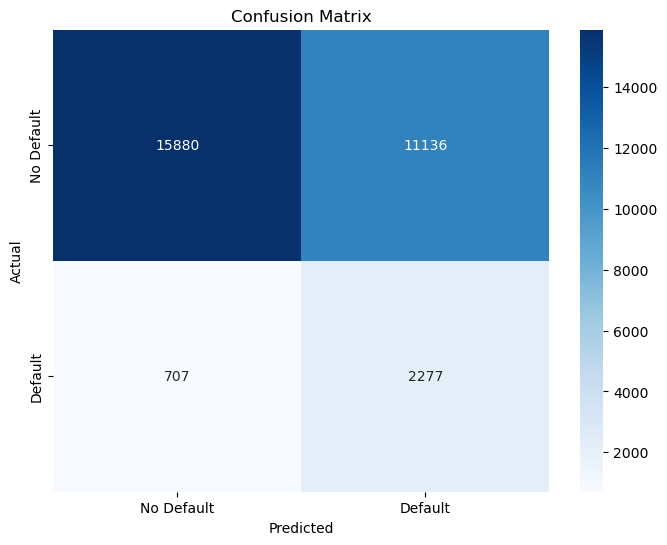

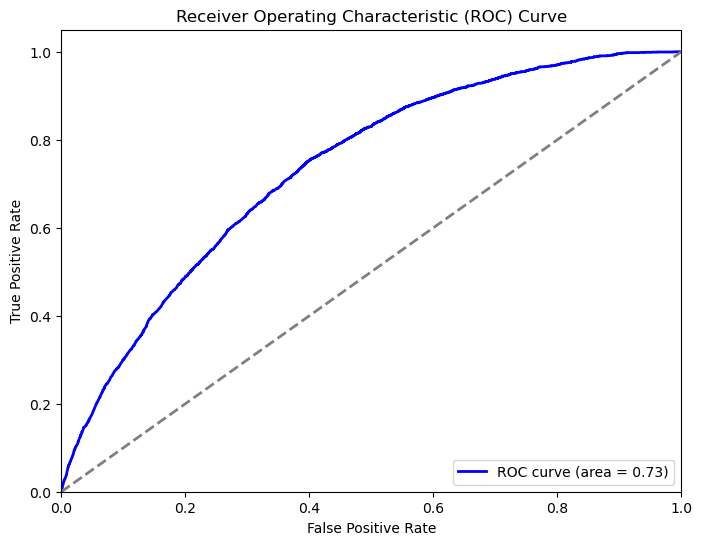

In [ ]:
# Predict the test set
y_pred_prob_xgb = xgb_model.predict(dtest)

# Convert proabilities into binary predictions
y_pred_xgb = np.where(y_pred_prob_xgb > 0.5, 1, 0)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")

# Balanced accuracy
balanced_acc_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
print(f"Balanced Accuracy: {balanced_acc_xgb}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_xgb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_xgb, tpr_xgb, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_xgb:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [23]:
import lightgbm as lgb

# Convert the dataset into LightGBM's DMatrix format
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)

# Define parameters for the LightGBM model
params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "max_depth": 6,
    "scale_pos_weight": y_train.value_counts()[0] / y_train.value_counts()[1],
    "random_state": 42,
}

# Train the model
lgb_model = lgb.train(params, dtrain, num_boost_round=1000, valid_sets=[dtrain, dtest])


[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Warning] Provided parameters constrain tree depth (max_depth=6) without explicitly setting 'num_leaves'. This can lead to underfitting. To resolve this warning, pass 'num_leaves' (<=64) in params. Alternatively, pass (max_depth=-1) and just use 'num_leaves' to constrain model complexity.
[LightGBM] [Info] Number of positive: 6963, number of negative: 63037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 70000, numb

Accuracy: 0.6116666666666667
Balanced Accuracy: 0.6712559769962552
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.60      0.73     27016
           1       0.17      0.75      0.28      2984

    accuracy                           0.61     30000
   macro avg       0.56      0.67      0.51     30000
weighted avg       0.88      0.61      0.69     30000



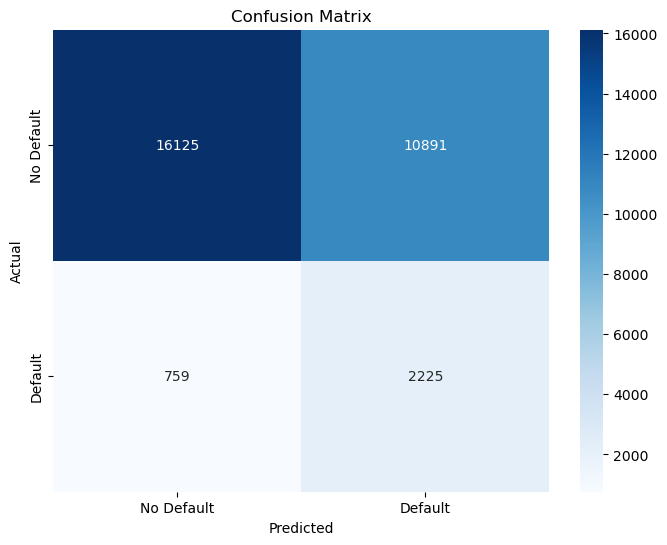

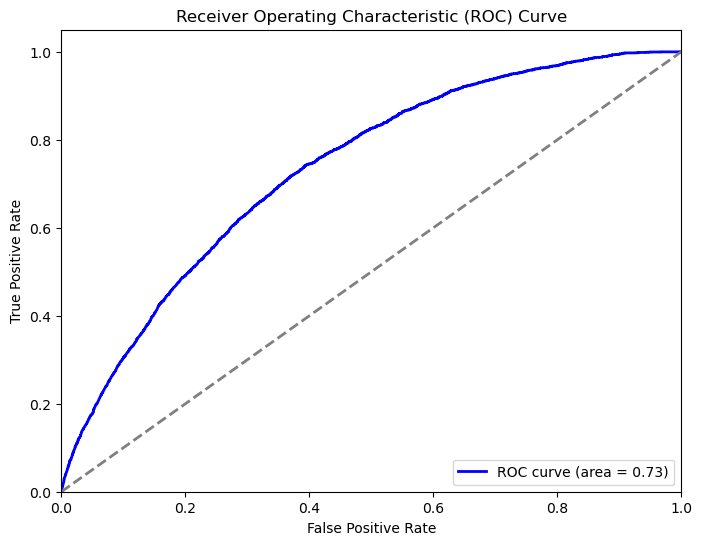

In [24]:
# Predict the test set
y_pred_prob_lgb = lgb_model.predict(X_test)

# Convert probabilities into binary predictions
y_pred_lgb = np.where(y_pred_prob_lgb > 0.5, 1, 0)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy: {accuracy_lgb}")

# Balanced accuracy
balanced_acc_lgb = balanced_accuracy_score(y_test, y_pred_lgb)
print(f"Balanced Accuracy: {balanced_acc_lgb}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Confusion matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_lgb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_prob_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_lgb, tpr_lgb, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_lgb:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.6076
Balanced Accuracy: 0.6421685570500968
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73     27016
           1       0.16      0.69      0.26      2984

    accuracy                           0.61     30000
   macro avg       0.55      0.64      0.50     30000
weighted avg       0.87      0.61      0.69     30000



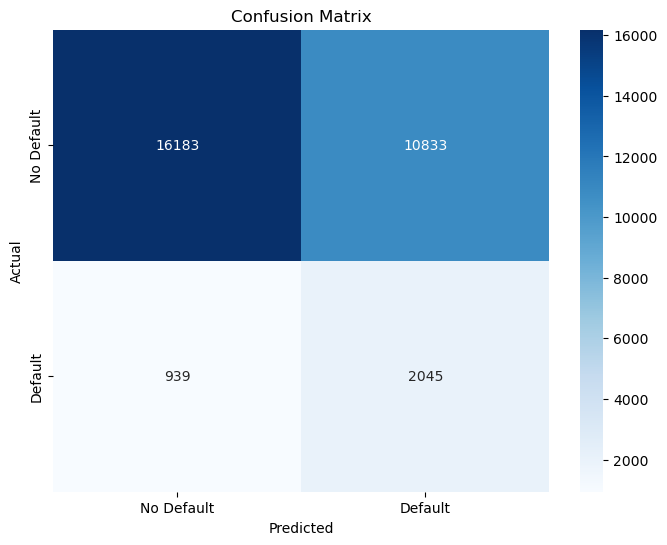

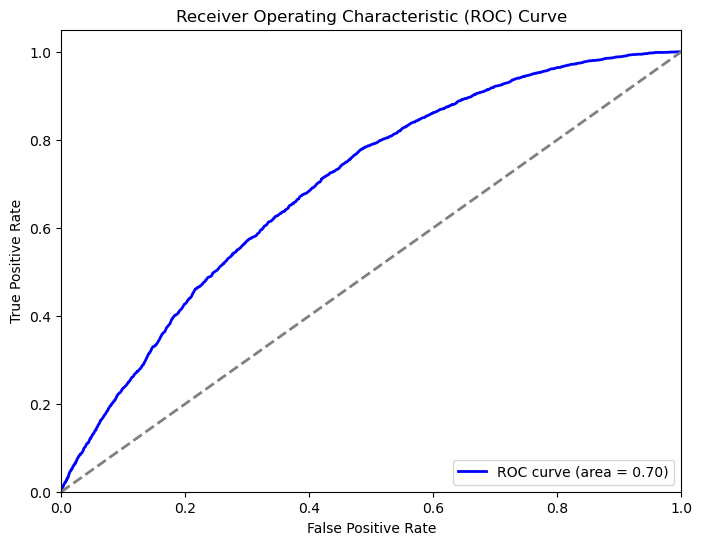

In [25]:
# Balanced Random Forest

from imblearn.ensemble import BalancedRandomForestClassifier

brf = BalancedRandomForestClassifier(n_estimators=1000, random_state=42)

brf.fit(X_train, y_train)

y_pred_brf = brf.predict(X_test)

accuracy_brf = accuracy_score(y_test, y_pred_brf)

print(f"Accuracy: {accuracy_brf}")

balanced_acc_brf = balanced_accuracy_score(y_test, y_pred_brf)

print(f"Balanced Accuracy: {balanced_acc_brf}")

print("Classification Report:")

print(classification_report(y_test, y_pred_brf))

conf_matrix_brf = confusion_matrix(y_test, y_pred_brf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_brf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_prob_brf = brf.predict_proba(X_test)[:, 1]

fpr_brf, tpr_brf, _ = roc_curve(y_test, y_prob_brf)
roc_auc_brf = auc(fpr_brf, tpr_brf)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_brf, tpr_brf, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_brf:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# SVM with RBF Kernel

from sklearn.svm import SVC

svm = SVC(kernel="rbf", class_weight="balanced", probability=True, random_state=42)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")

balanced_acc_svm = balanced_accuracy_score(y_test, y_pred_svm)

print(f"Balanced Accuracy: {balanced_acc_svm}")

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))


0:	total: 75.2ms	remaining: 1m 15s
100:	total: 8.31s	remaining: 1m 13s
200:	total: 16.6s	remaining: 1m 6s
300:	total: 24.6s	remaining: 57.2s
400:	total: 32.3s	remaining: 48.2s
500:	total: 40.6s	remaining: 40.4s
600:	total: 48.4s	remaining: 32.1s
700:	total: 56.4s	remaining: 24.1s
800:	total: 1m 4s	remaining: 16s
900:	total: 1m 11s	remaining: 7.88s
999:	total: 1m 19s	remaining: 0us
0:	total: 87.7ms	remaining: 1m 27s
100:	total: 7.36s	remaining: 1m 5s
200:	total: 14.7s	remaining: 58.3s
300:	total: 22.2s	remaining: 51.6s
400:	total: 28.9s	remaining: 43.2s
500:	total: 36.4s	remaining: 36.2s
600:	total: 43.5s	remaining: 28.9s
700:	total: 50.4s	remaining: 21.5s
800:	total: 57.7s	remaining: 14.3s
900:	total: 1m 4s	remaining: 7.11s
999:	total: 1m 11s	remaining: 0us
0:	total: 62.6ms	remaining: 1m 2s
100:	total: 6.73s	remaining: 59.9s
200:	total: 14.1s	remaining: 55.9s
300:	total: 21.2s	remaining: 49.3s
400:	total: 28.3s	remaining: 42.3s
500:	total: 35.3s	remaining: 35.2s
600:	total: 43s	remaini

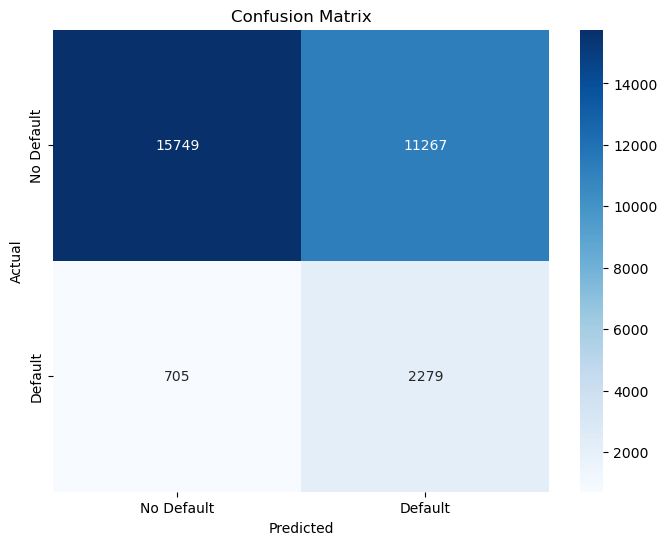

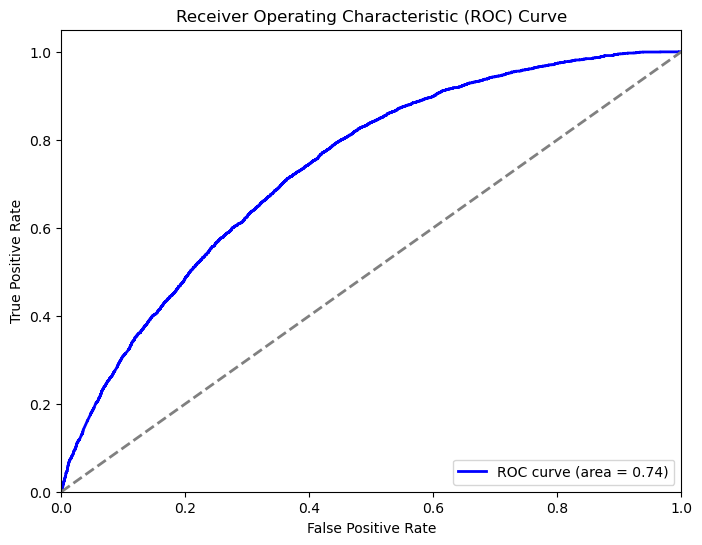

In [12]:
# Stacking Classifier

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import catboost as cb

# Define the base models

base_models = [
    ("lr", LogisticRegression(max_iter=1000, class_weight="balanced")),
    ("rf", RandomForestClassifier(n_estimators=1000, class_weight="balanced")),
    (
        "cb",
        cb.CatBoostClassifier(
            iterations=1000,
            learning_rate=0.01,
            depth=6,
            boosting_type="Plain",
            cat_features=categorical_features,
            auto_class_weights="Balanced",
            eval_metric="AUC",
            verbose=100,
        ),
    ),
]

# Define the meta model

meta_model = LogisticRegression(max_iter=1000, class_weight="balanced")

# Initialize the stacking classifier

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit the model

stacking_clf.fit(X_train, y_train)

# Predict the test set

y_pred_stacking = stacking_clf.predict(X_test)


# Calculate accuracy

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy: {accuracy_stacking}")

# Balanced accuracy
balanced_accuracy_stacking = balanced_accuracy_score(y_test, y_pred_stacking)
print(f"Balanced Accuracy: {balanced_accuracy_stacking}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_stacking))

# Confusion matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_stacking,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]

fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_prob_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_stacking,
    tpr_stacking,
    color="blue",
    lw=2,
    label=f"ROC curve (area = {roc_auc_stacking:.2f})",
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


0:	total: 80.8ms	remaining: 1m 20s
100:	total: 7.76s	remaining: 1m 9s
200:	total: 15.8s	remaining: 1m 2s
300:	total: 23.4s	remaining: 54.3s
400:	total: 30.8s	remaining: 46s
500:	total: 38.2s	remaining: 38s
600:	total: 45.6s	remaining: 30.2s
700:	total: 53.5s	remaining: 22.8s
800:	total: 1m	remaining: 15.1s
900:	total: 1m 8s	remaining: 7.5s
999:	total: 1m 15s	remaining: 0us
Accuracy: 0.8262333333333334
Balanced Accuracy: 0.5969185870194289
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     27016
           1       0.23      0.31      0.26      2984

    accuracy                           0.83     30000
   macro avg       0.57      0.60      0.58     30000
weighted avg       0.85      0.83      0.84     30000



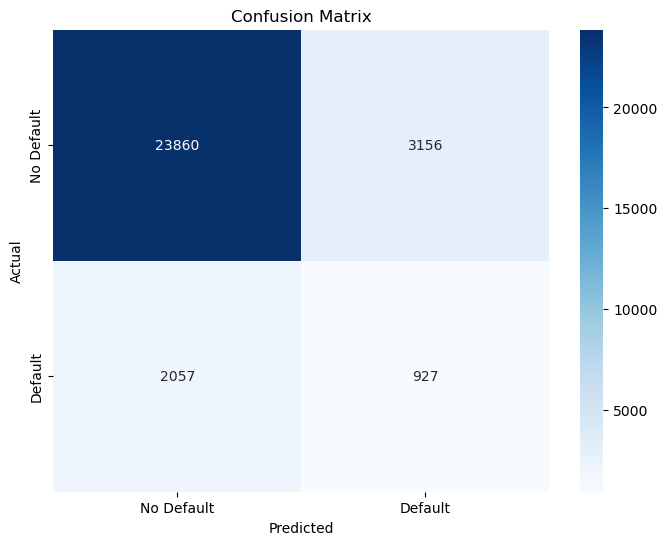

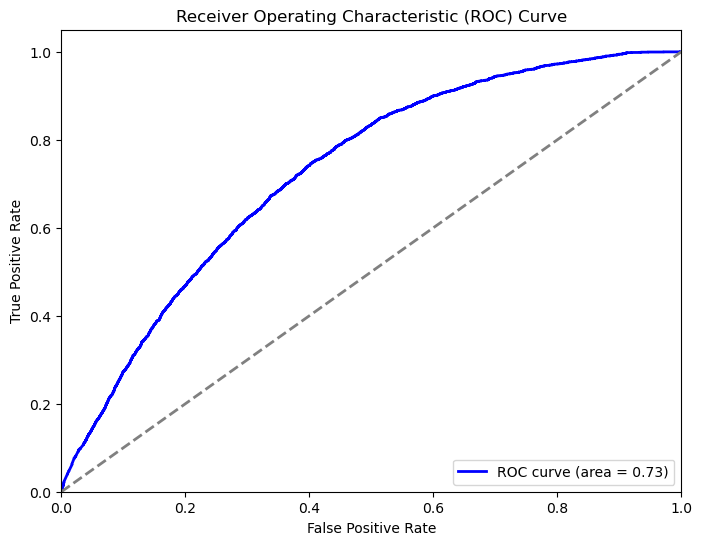

In [15]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier

# Define the base models

base_models = [
    ("lr", LogisticRegression(max_iter=1000, class_weight="balanced")),
    ("rf", RandomForestClassifier(n_estimators=1000, class_weight="balanced")),
    (
        "cb",
        cb.CatBoostClassifier(
            iterations=1000,
            learning_rate=0.01,
            depth=6,
            boosting_type="Plain",
            cat_features=categorical_features,
            auto_class_weights="Balanced",
            eval_metric="AUC",
            verbose=100,
        ),
    ),
]

# Initialize the voting classifier

voting_clf = VotingClassifier(estimators=base_models, voting="soft")

# Fit the model

voting_clf.fit(X_train, y_train)

# Predict the test set

y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy

accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy: {accuracy_voting}")

# Balanced accuracy
balanced_accuracy_voting = balanced_accuracy_score(y_test, y_pred_voting)
print(f"Balanced Accuracy: {balanced_accuracy_voting}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_voting))

# Confusion matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_voting,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]

fpr_voting, tpr_voting, _ = roc_curve(y_test, y_prob_voting)
roc_auc_voting = auc(fpr_voting, tpr_voting)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_voting,
    tpr_voting,
    color="blue",
    lw=2,
    label=f"ROC curve (area = {roc_auc_voting:.2f})",
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


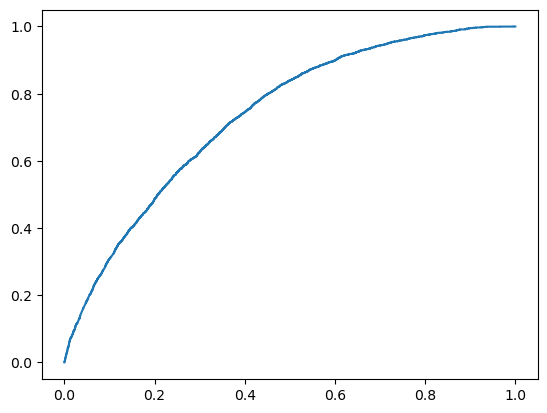

In [16]:
y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_stacking)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.show()

# Select a new threshold, e.g., one where tpr is high but fpr is low
optimal_threshold = 0.4  # Example threshold
y_pred_stacking_new = (y_prob_stacking >= optimal_threshold).astype(int)


In [18]:
# Oversampling with SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(y_train_resampled.value_counts())

default
0    63037
1    63037
Name: count, dtype: int64


In [19]:
# Fit Catboost on Resampled Data

cb_model_resampled = cb.CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    boosting_type="Plain",
    cat_features=categorical_features,
    auto_class_weights="Balanced",
    eval_metric="AUC",
    verbose=100,
)

cb_model_resampled.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=(X_test, y_test),
    early_stopping_rounds=50,
)

0:	test: 0.6880423	best: 0.6880423 (0)	total: 81.8ms	remaining: 1m 21s
100:	test: 0.7114091	best: 0.7118315 (56)	total: 10s	remaining: 1m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7118314569
bestIteration = 56

Shrink model to first 57 iterations.


Accuracy: 0.6763
Balanced Accuracy: 0.6503530129300797
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     27016
           1       0.18      0.62      0.28      2984

    accuracy                           0.68     30000
   macro avg       0.56      0.65      0.53     30000
weighted avg       0.87      0.68      0.74     30000



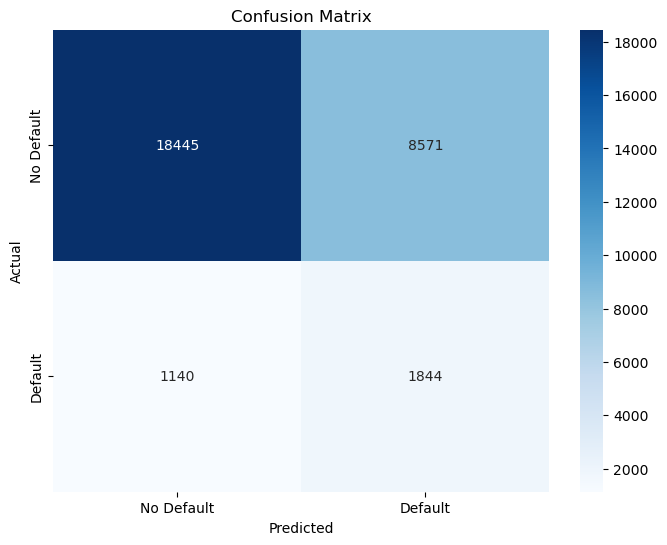

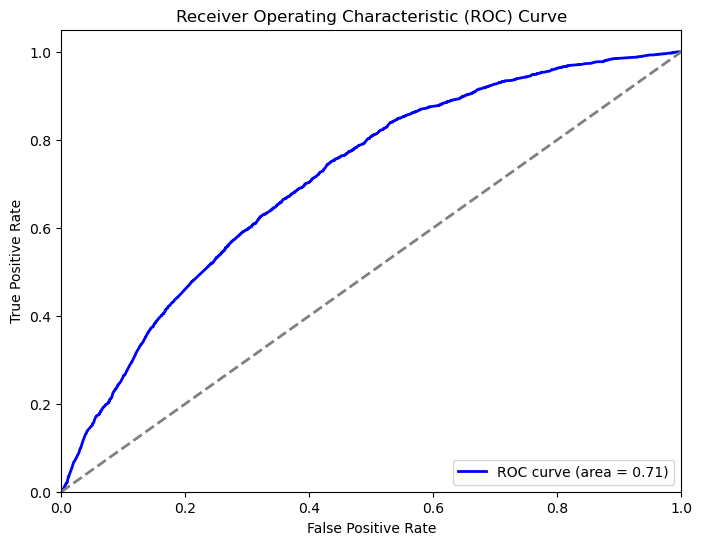

In [20]:
# Predict the test set
y_pred_cb_resampled = cb_model_resampled.predict(X_test)

# Calculate accuracy
accuracy_cb_resampled = accuracy_score(y_test, y_pred_cb_resampled)

print(f"Accuracy: {accuracy_cb_resampled}")

# Balanced accuracy
balanced_acc_cb_resampled = balanced_accuracy_score(y_test, y_pred_cb_resampled)

print(f"Balanced Accuracy: {balanced_acc_cb_resampled}")

# Classification report
print("Classification Report:")

print(classification_report(y_test, y_pred_cb_resampled))

# Confusion matrix
conf_matrix_cb_resampled = confusion_matrix(y_test, y_pred_cb_resampled)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_cb_resampled,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
y_prob_cb_resampled = cb_model_resampled.predict_proba(X_test)[:, 1]

fpr_cb_resampled, tpr_cb_resampled, _ = roc_curve(y_test, y_prob_cb_resampled)
roc_auc_cb_resampled = auc(fpr_cb_resampled, tpr_cb_resampled)

plt.figure(figsize=(8, 6))

plt.plot(
    fpr_cb_resampled,
    tpr_cb_resampled,
    color="blue",
    lw=2,
    label=f"ROC curve (area = {roc_auc_cb_resampled:.2f})",
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [40]:
X_train_new

,sex,employment,married,income,digital3,Logistic PD,Random Forest PD,CatBoost PD
93261,1,2,1,15064,0.579146,0.332785,0.023,0.292901
45371,0,2,0,6816,0.486127,0.519098,0.036,0.651488
81342,0,1,0,0,0.862158,0.617709,0.033,0.588272
80334,0,2,1,28404,0.193084,0.166982,0.002,0.201857
38352,1,2,0,7030,0.000000,0.607572,0.682,0.657437
...,...,...,...,...,...,...,...,...
67987,1,2,1,26900,0.423650,0.161235,0.004,0.168901
66538,1,0,1,0,0.502762,0.708247,0.312,0.766742
99571,1,2,1,13245,0.543493,0.376912,0.668,0.359966
78531,0,2,1,11035,0.000000,0.530045,0.001,0.477361


In [49]:
X_test_new = X_test.copy()

In [48]:
X_test.drop(["Logistic PD"], axis=1, inplace=True)

In [50]:
X_test_new["Logistic PD"] = lr.predict_proba(X_test)[:, 1]
X_test_new["Random Forest PD"] = rf.predict_proba(X_test)[:, 1]
X_test_new["CatBoost PD"] = cb_model.predict_proba(X_test)[:, 1]

In [51]:
X_test_new

,sex,employment,married,income,digital3,Logistic PD,Random Forest PD,CatBoost PD
83053,0,2,1,49565,0.028969,0.032278,0.006,0.101632
46838,0,2,0,5177,0.694658,0.515674,0.025,0.588832
61081,0,1,0,0,0.648785,0.656139,0.003,0.639379
53014,0,2,1,6638,0.777324,0.478443,0.015,0.522856
72124,0,0,1,10024,0.000000,0.590821,0.000,0.434151
...,...,...,...,...,...,...,...,...
85522,1,2,1,9799,0.516022,0.458002,0.010,0.491149
76089,1,2,0,15518,0.737529,0.287336,0.015,0.282510
34552,0,3,0,28747,0.230634,0.142671,0.009,0.134209
95374,1,0,1,9382,0.227856,0.562006,0.177,0.534903


In [55]:
Test_df = pd.concat([X_test_new, y_test], axis=1)

In [56]:
Test_df

,sex,employment,married,income,digital3,Logistic PD,Random Forest PD,CatBoost PD,default
83053,0,2,1,49565,0.028969,0.032278,0.006,0.101632,0
46838,0,2,0,5177,0.694658,0.515674,0.025,0.588832,0
61081,0,1,0,0,0.648785,0.656139,0.003,0.639379,1
53014,0,2,1,6638,0.777324,0.478443,0.015,0.522856,0
72124,0,0,1,10024,0.000000,0.590821,0.000,0.434151,0
...,...,...,...,...,...,...,...,...,...
85522,1,2,1,9799,0.516022,0.458002,0.010,0.491149,0
76089,1,2,0,15518,0.737529,0.287336,0.015,0.282510,0
34552,0,3,0,28747,0.230634,0.142671,0.009,0.134209,0
95374,1,0,1,9382,0.227856,0.562006,0.177,0.534903,0


,sex,employment,married,income,digital1,digital2,digital3,default
0,0,0,0,0,0.749267,0.422656,0.738735,0
1,0,2,1,26108,0.697428,0.596361,0.733947,0
2,0,2,1,11810,0.000000,0.652496,0.000000,0
3,0,0,1,0,0.000000,0.000000,0.000000,0
4,1,3,1,6310,0.000000,0.041123,0.203202,0
...,...,...,...,...,...,...,...,...
99995,1,1,0,4564,0.000000,0.333091,0.876951,0
99996,0,2,0,18882,0.000000,0.367979,0.556855,0
99997,0,2,1,19121,0.858688,0.508737,0.722149,0
99998,0,2,1,53563,0.736672,0.328757,0.000000,0


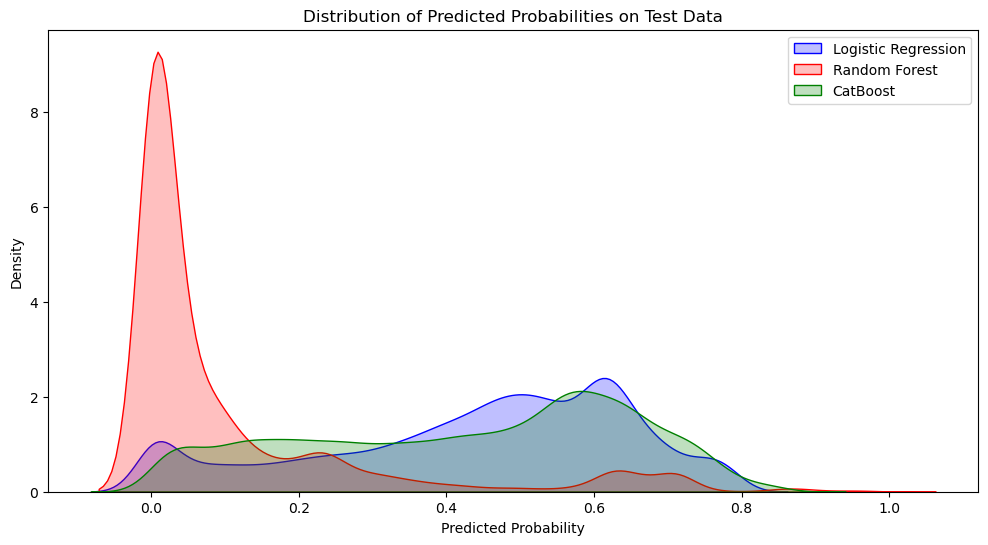

In [58]:
plt.figure(figsize=(12, 6))

sns.kdeplot(
    X_test_new["Logistic PD"], label="Logistic Regression", color="blue", shade=True
)
sns.kdeplot(
    X_test_new["Random Forest PD"], label="Random Forest", color="red", shade=True
)
sns.kdeplot(X_test_new["CatBoost PD"], label="CatBoost", color="green", shade=True)

plt.title("Distribution of Predicted Probabilities on Test Data")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.show()

In [61]:
num_digital3_zero = (df["digital3"] == 0).sum()
print(f"Number of rows where digital3 is 0: {num_digital3_zero}")

Number of rows where digital3 is 0: 21055


In [62]:
def replace_digital3(row):
    if row["digital3"] == 0:
        if row["digital1"] != 0 and row["digital2"] != 0:
            return (row["digital1"] + row["digital2"]) / 2
        elif row["digital1"] != 0:
            return row["digital1"]
        elif row["digital2"] != 0:
            return row["digital2"]
    return row["digital3"]


df["digital3"] = df.apply(replace_digital3, axis=1)

In [68]:
df_2 = df.copy()

In [73]:
df_2 = df_2[df_2["digital3"] != 0]

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [82]:
X = df_2.drop(["default", "digital1", "digital2"], axis=1)
y = df_2["default"]

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [83]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [106]:
X = df_2.drop(["default", "digital1", "digital2"], axis=1)
y = df_2["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [91]:
cb_modeL_new.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100)

Learning rate set to 0.078165
0:	test: 0.7190125	best: 0.7190125 (0)	total: 43.4ms	remaining: 1m 5s
100:	test: 0.7386255	best: 0.7386917 (95)	total: 4.02s	remaining: 55.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7386917072
bestIteration = 95

Shrink model to first 96 iterations.


Accuracy: 0.6122841662869006
Balanced Accuracy: 0.6759046654282335
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.60      0.73     17783
           1       0.17      0.76      0.28      1966

    accuracy                           0.61     19749
   macro avg       0.56      0.68      0.51     19749
weighted avg       0.88      0.61      0.69     19749



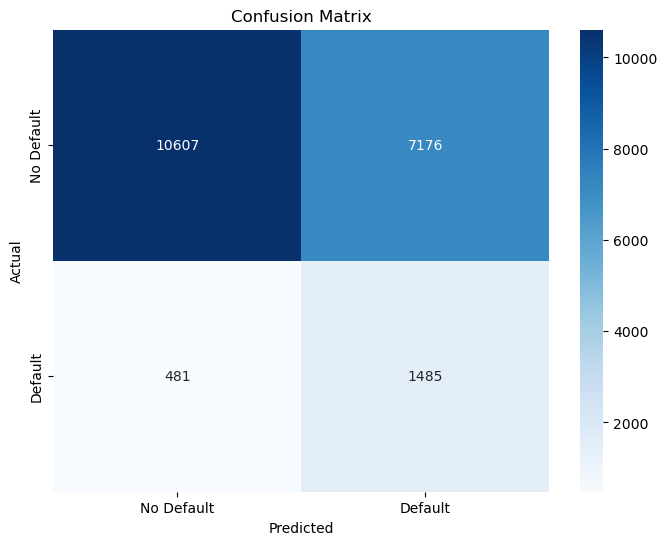

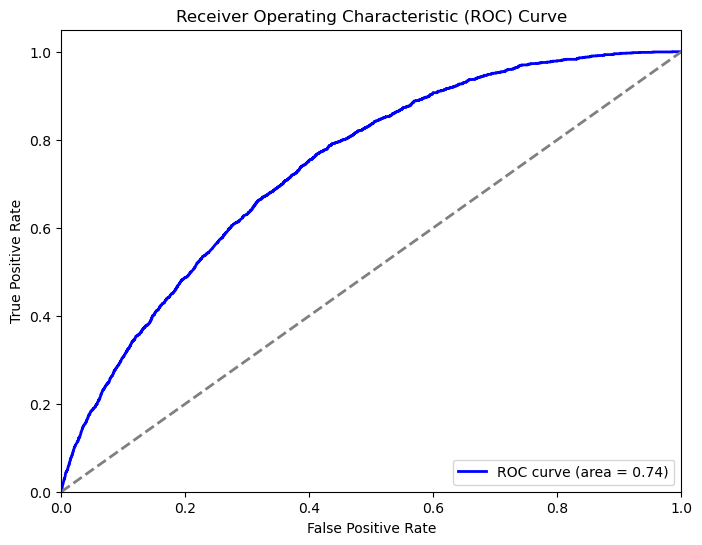

In [92]:
# Predict the test set
y_pred_cb_new = cb_modeL_new.predict(X_test)

# Calculate accuracy
accuracy_cb_new = accuracy_score(y_test, y_pred_cb_new)
print(f"Accuracy: {accuracy_cb_new}")

# Balanced accuracy
balanced_acc_cb_new = balanced_accuracy_score(y_test, y_pred_cb_new)
print(f"Balanced Accuracy: {balanced_acc_cb_new}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_cb_new))

# Confusion matrix
conf_matrix_cb_new = confusion_matrix(y_test, y_pred_cb_new)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_cb_new,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Plot ROC AUC
y_prob_cb_new = cb_modeL_new.predict_proba(X_test)[:, 1]
fpr_cb_new, tpr_cb_new, _ = roc_curve(y_test, y_prob_cb_new)
roc_auc_cb_new = auc(fpr_cb_new, tpr_cb_new)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_cb_new,
    tpr_cb_new,
    color="blue",
    lw=2,
    label=f"ROC curve (area = {roc_auc_cb_new:.2f})",
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [80]:
# Get feature importances from the CatBoost model
feature_importances = cb_modeL_new.get_feature_importance()

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": feature_importances}
)

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(
    by="Importance", ascending=False
)

# Display the feature importances
print(feature_importances_df)

      Feature  Importance
3      income   65.860049
1  employment   15.598761
4    digital3   13.377223
2     married    3.875494
0         sex    1.288472


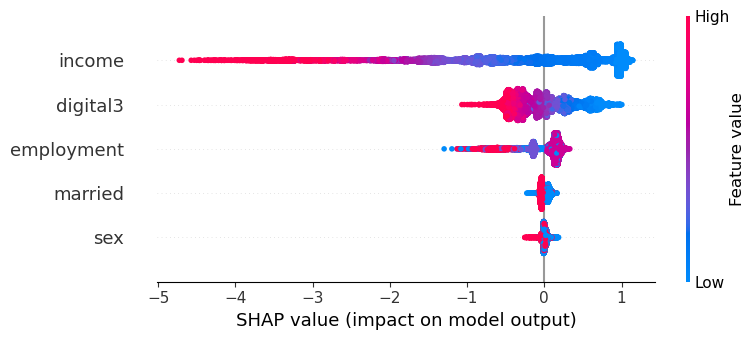

In [94]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(cb_modeL_new)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)

In [105]:
X_test

,sex,employment,married,income,digital3
22001,1.159416,0.395453,-1.243625,1.949842,0.752908
30639,-0.862503,1.563010,0.804101,-0.283874,-1.330834
35740,1.159416,0.395453,0.804101,-0.283212,-1.899521
43792,-0.862503,0.395453,0.804101,-0.176485,-1.684071
56287,-0.862503,0.395453,0.804101,0.167156,0.644325
...,...,...,...,...,...
21424,1.159416,0.395453,-1.243625,-0.195559,0.084007
23915,-0.862503,0.395453,-1.243625,1.316659,0.025844
43707,-0.862503,-0.772105,0.804101,-0.386340,0.272741
33465,1.159416,0.395453,-1.243625,0.847486,0.074853
